# Лабораторная работа №2. Исследовательский анализ данных 2024

##**Индивидуальное задание** <br>
В соответствии с указанными вариантами, необходимо выполнить работу с данными и заданиями под вариантом №10. <br> Данные содержат информацию о кредитных заявках:
* возраст
* доход
* статус домовладения (Собственный, Ипотека, Аренда)
* стаж работы в годах
* цель кредита
* сумма кредита по заявке
* процентная ставка
* статус одобрения кредита
* сумма кредита в процентах от дохода
* не допустил ли заявитель ранее дефолта по кредиту (да, нет)
* длина кредитной истории заявителя

## Ход выполнения работы

Для работы с табличными данными используется библиотека pandas.<br> В данной библиотеке присутствуют функции для чтения данных с различными параметрами для персонализированного вывода информации.

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk2.csv')
df

Id   Age  Income      Home  Emp_length             Intent  Amount  \
0      0  22.0   59000      RENT       123.0           PERSONAL   35000   
1      1  21.0    9600       OWN         5.0          EDUCATION    1000   
2      2  25.0    9600  MORTGAGE         1.0            MEDICAL    5500   
3      3  23.0   65500      RENT         4.0            MEDICAL   35000   
4      4  24.0   54400      RENT         8.0            MEDICAL   35000   
..   ...   ...     ...       ...         ...                ...     ...   
647  647  26.0   20004  MORTGAGE         4.0    HOMEIMPROVEMENT    3600   
648  648  22.0   58000      RENT         0.0  DEBTCONSOLIDATION   20000   
649  649  23.0   58800      RENT         7.0  DEBTCONSOLIDATION   20000   
650  649  23.0   58800      RENT         7.0  DEBTCONSOLIDATION   20000   
651  649  23.0   58800      RENT         7.0  DEBTCONSOLIDATION   20000   

      Rate  Status  Percent_income Default  Cred_length  
0    16.02       1            0.59       Y            3  
1    11.14       0            0.10       N            2  
2    12.87       1            0.57       N            3  
3    15.23       1            0.53       N            2  
4    14.27       1            0.55       Y            4  
..     ...     ...             ...     ...          ...  
647    NaN       0            0.18       N            2  
648  13.11       1            0.34       N            2  
649   7.66       1            0.34       N            3  
650   7.66       1            0.34       N            3  
651   7.66       1            0.34       N            3  

[652 rows x 12 columns]

Используется команда df.info() для оценки данных.

В таблице 652 записи, 2 столбца не заполнены полностью, также содержится информация о типе данных каждого столбца.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    float64
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.2+ KB


Было принято решение удалить строки, где возраст или стаж работы работника был более ста, так как это не соответствует реальному возрасту

In [3]:
df = df[df['Age'] <= 100]
df = df[df['Emp_length'] <= 100]
df = df.drop_duplicates().reset_index(drop=True)
df.dropna(subset=['Rate'], inplace=True)

Также просматриваются категориальный значения на наличия неявных дубликатов

In [4]:
display(df['Home'].unique())
display(df['Default'].unique())
display(df['Intent'].unique())

array(['OWN', 'MORTGAGE', 'RENT', 'RENET', 'OTHER'], dtype=object)

array(['N', 'Y', 'No'], dtype=object)

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

Неявные дубликаты заменяются с помощью команды replace

In [5]:
df['Home'] = df['Home'].replace('RENET','RENT')
df['Default'] = df['Default'].replace('No','N')

Для анализа полученных данных было построено несколько диаграмм, в том числе матрицы диаграмм рассеивания. В качестве библиотеки для визуализации выбрали `seaborn`, а для параметра `hue` использовали столбец `Home`, который содержит 4 категории: Age, Income, Amount и Percent_income.

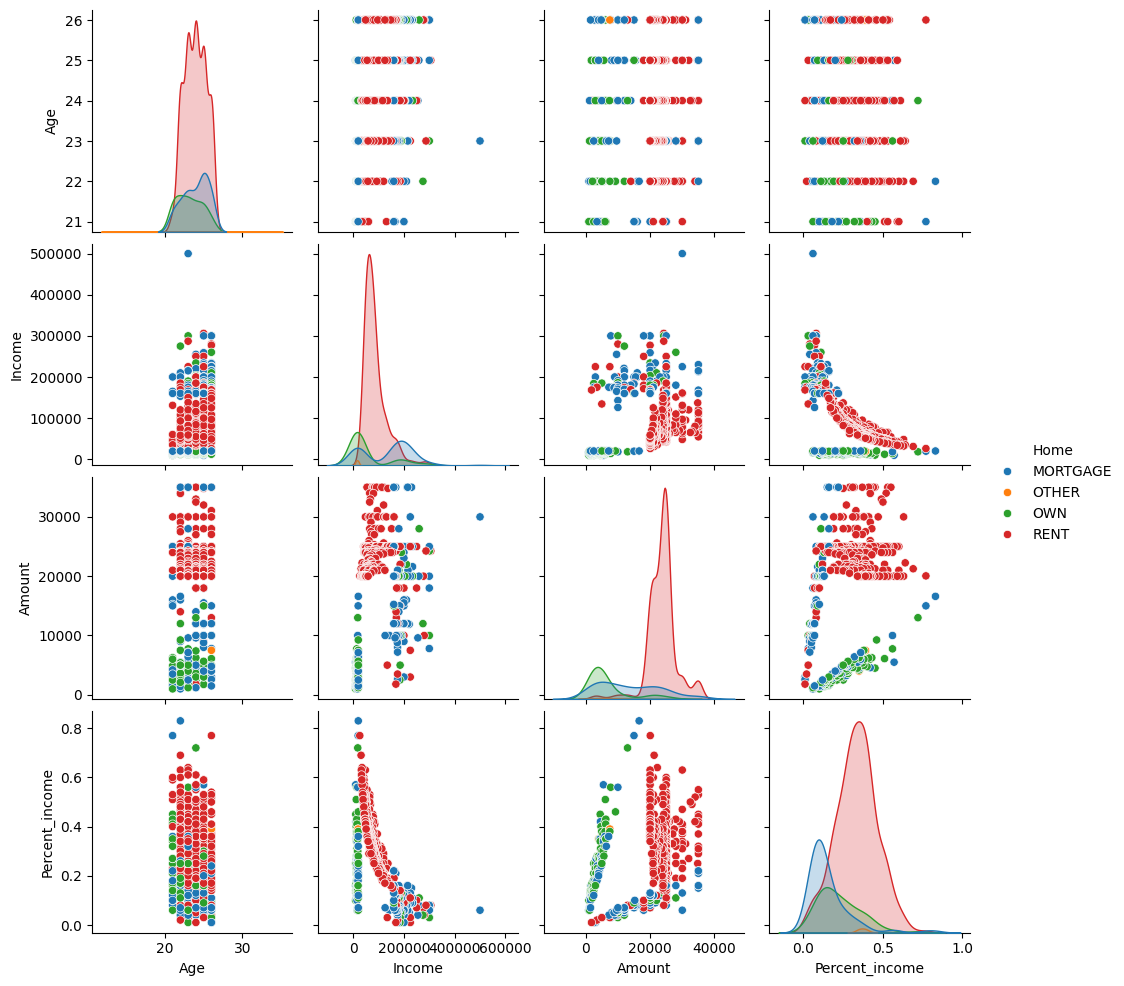

In [6]:
import seaborn as sns
df['Home'] = df['Home'].astype('category')
sns.pairplot(df[['Age','Income','Amount','Percent_income','Home']], diag_kind="kde", hue="Home")

Построенные диаграммы выявили несколько закономерностей:

Возраст (Age)
*   Большинство клиентов находятся в возрасте от 21 до 26 лет, категория RENT(аренда) охватывает все возрастные группы, что нельзя сказать о других категориях

Доход (Income)
*   У клиентов арендующих жилье доход в основном расположен до 100000, можно сказать, что люди с более низким доходом чаще арендуют жилье
*   Высокий доход у категории own и mortgage, это означает, что доходы более 100000 характерны для собственников или тех, кто берет жилье в ипотеку

Сумма кредита по заявке (Amount)
*   Клиенты, которые взяли жилье ипотеку (own), берут займы разного размера, включая как небольшие, так и крупные суммы. Это видно по широкому распределению точек на графике.
*   Клиенты арендующие жилье, в основном берут крупные суммы кредита, это может быть связано с большой нехваткой финансов, из-за чего они вынуждены занимать большие суммы.
*   Собственники как правило, берут небольшие кредиты, что может свидетельствовать о более устойчивом финансовом положении или меньшей потребности в крупных займах.

Сумма кредита в процентах от дохода (Percent_income)
*   Чем выше доход, тем меньшую долю составляет сумма кредита по отношению дохода, это хорошо видно для категорий
*   Клиенты с более низким доход, как правило берут кредиты, которые занимают значительную часть их дохода
*   Клиенты с арендованным жильём (Rent) имеют наибольший процент дохода, направленный на кредит, что может свидетельствовать о более высоком уровне риска для них.

Категория other
*   Из-за небольшого числа клиентов и широкого разброса данных сложно сделать чёткий вывод о категории other












Проверим зависимость данных, для этого исследуем коэффицент корреляции, известно, что положительная корреляция означает увеличение одной переменной связано с увеличением другой
переменной.


*   Корреляция — это нормализованная ковариация, которая измеряет, насколько сильно и в каком направлении две переменные линейно связаны. Она масштабируется в пределах от -1 до 1
*   Ковариация показывает направление взаимосвязи (положительное или отрицательное), но не дает представления о силе связи.
Корреляция не только показывает направление связи, но и говорит о том, насколько сильно две переменные связаны, при этом она нормализована в диапазоне от -1 до 1.

In [7]:
df.cov(numeric_only = 'True')

Id           Age        Income    Emp_length  \
Id              3.527374e+04    -14.823962 -4.458341e+06    -41.193575   
Age            -1.482396e+01      2.195815  3.439451e+04      0.934722   
Income         -4.458341e+06  34394.508468  4.787036e+09  40703.785888   
Emp_length     -4.119358e+01      0.934722  4.070379e+04      9.277402   
Amount         -2.467062e+05   2567.025225  1.752078e+08   3890.139721   
Rate           -2.974777e+01      0.122818  1.024090e+04     -0.385187   
Status          1.008643e+01     -0.123375 -1.997738e+04     -0.110953   
Percent_income  5.508429e+00     -0.038793 -6.603531e+03     -0.042552   
Cred_length     3.491514e+00     -0.000187  3.817840e+02     -0.204655   

                      Amount          Rate        Status  Percent_income  \
Id             -2.467062e+05    -29.747772     10.086429        5.508429   
Age             2.567025e+03      0.122818     -0.123375       -0.038793   
Income          1.752078e+08  10240.904187 -19977.379642    -6603.530782   
Emp_length      3.890140e+03     -0.385187     -0.110953       -0.042552   
Amount          7.985605e+07   5741.278746    356.019218      434.287366   
Rate            5.741279e+03     10.580125      0.316564        0.031006   
Status          3.560192e+02      0.316564      0.240630        0.049272   
Percent_income  4.342874e+02      0.031006      0.049272        0.022572   
Cred_length    -3.522913e+01     -0.127757     -0.021729       -0.003353   

                Cred_length  
Id                 3.491514  
Age               -0.000187  
Income           381.784038  
Emp_length        -0.204655  
Amount           -35.229130  
Rate              -0.127757  
Status            -0.021729  
Percent_income    -0.003353  
Cred_length        0.659047


* Самая высокая ковариация наблюдается между Income (доход) и Amount (сумма кредита), она равна 1.752078e+08. Это означает, что увеличение дохода коррелирует с увеличением суммы кредита. Логично, что люди с более высоким доходом могут брать более крупные кредиты.
Income и Emp_length:

* Ковариация между Income (доход) и Emp_length (стаж работы) равна 40703.79, что указывает на положительную, но слабую связь. Это предполагает, что больший стаж работы может сопровождаться немного более высоким доходом.
Income и Percent_income:

* Ковариация между Income и Percent_income отрицательная (-6603.53). Это может указывать на то, что чем выше доход, тем меньшую долю дохода составляет сумма кредита, что естественно.

In [8]:
df.corrwith(df['Income'], numeric_only = True)

Id               -0.343095
Age               0.335473
Income            1.000000
Emp_length        0.193147
Amount            0.283378
Rate              0.045505
Status           -0.588613
Percent_income   -0.635273
Cred_length       0.006797
dtype: float64

Доход имеет наиболее значимые связи с возрастом, статусом кредита и процентом дохода, который уходит на кредиты. Люди с более высоким доходом чаще получают одобрение на кредиты. Также можно выделить, что доход почти не зависит от стажа работы, на это указывает к/ф = 0.19, что близко к нулю.

In [9]:
df.corrwith(df['Age'], numeric_only = True)

Id               -0.053265
Age               1.000000
Income            0.335473
Emp_length        0.207096
Amount            0.193856
Rate              0.025481
Status           -0.169729
Percent_income   -0.174252
Cred_length      -0.000156
dtype: float64

Возраст демонстрирует наиболее значимые связи с доходом и стажем работы, что логично с возрастом доход и стаж работы, как правило, растут. Остальные взаимосвязи очень слабы и не показывают существенного влияния возраста.

In [10]:
df.corr(numeric_only=True)

Id       Age    Income  Emp_length    Amount      Rate  \
Id              1.000000 -0.053265 -0.343095   -0.072010 -0.146994 -0.048695   
Age            -0.053265  1.000000  0.335473    0.207096  0.193856  0.025481   
Income         -0.343095  0.335473  1.000000    0.193147  0.283378  0.045505   
Emp_length     -0.072010  0.207096  0.193147    1.000000  0.142922 -0.038879   
Amount         -0.146994  0.193856  0.283378    0.142922  1.000000  0.197519   
Rate           -0.048695  0.025481  0.045505   -0.038879  0.197519  1.000000   
Status          0.109480 -0.169729 -0.588613   -0.074260  0.081216  0.198400   
Percent_income  0.195218 -0.174252 -0.635273   -0.092987  0.323475  0.063448   
Cred_length     0.022900 -0.000156  0.006797   -0.082766 -0.004856 -0.048382   

                  Status  Percent_income  Cred_length  
Id              0.109480        0.195218     0.022900  
Age            -0.169729       -0.174252    -0.000156  
Income         -0.588613       -0.635273     0.006797  
Emp_length     -0.074260       -0.092987    -0.082766  
Amount          0.081216        0.323475    -0.004856  
Rate            0.198400        0.063448    -0.048382  
Status          1.000000        0.668559    -0.054563  
Percent_income  0.668559        1.000000    -0.027489  
Cred_length    -0.054563       -0.027489     1.000000

Для удобства выводятся только те значения, которые по модулю больше 0.5

In [11]:
correlation_matrix = df.corr(numeric_only=True)
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
high_corr

Id  Age    Income  Emp_length  Amount  Rate    Status  \
Id              1.0  NaN       NaN         NaN     NaN   NaN       NaN   
Age             NaN  1.0       NaN         NaN     NaN   NaN       NaN   
Income          NaN  NaN  1.000000         NaN     NaN   NaN -0.588613   
Emp_length      NaN  NaN       NaN         1.0     NaN   NaN       NaN   
Amount          NaN  NaN       NaN         NaN     1.0   NaN       NaN   
Rate            NaN  NaN       NaN         NaN     NaN   1.0       NaN   
Status          NaN  NaN -0.588613         NaN     NaN   NaN  1.000000   
Percent_income  NaN  NaN -0.635273         NaN     NaN   NaN  0.668559   
Cred_length     NaN  NaN       NaN         NaN     NaN   NaN       NaN   

                Percent_income  Cred_length  
Id                         NaN          NaN  
Age                        NaN          NaN  
Income               -0.635273          NaN  
Emp_length                 NaN          NaN  
Amount                     NaN          NaN  
Rate                       NaN          NaN  
Status                0.668559          NaN  
Percent_income        1.000000          NaN  
Cred_length                NaN          1.0



*   Income и Status (-0.588613): Отрицательная корелляция, указывает на то, что  с увеличением дохода вероятность получения отказа в кредите (статус 0) снижается.
*   Income и Percent_income (-0.635273): Отрицательная корелляция, это говорит о том, что люди с более высоким доходом, как правило, тратят меньшую долю своего дохода на кредитные обязательства.
*   Status и Percent_income (0.668559):Это указывает на то, что лица с высоким статусом (одобрение кредита) чаще имеют меньший процент дохода, который уходит на погашение кредита.
*   Другие переменные не показали значимой корреляции









Для удобства анализа взаимосвязей между переменными была построена тепловая карта корреляции с использованием библиотеки Seaborn. В процессе построения карты были заданы следующие параметры:

- `numeric_only=True` — учитываются только числовые значения;
- `annot=True` — отображаются значения коэффициентов корреляции непосредственно на карте;
- `vmin=-1` — минимальное значение, отображаемое на тепловой карте;
- `vmax=1` — максимальное значение, отображаемое на тепловой карте;
- `center=0` — центр цветовой карты, что позволяет наглядно видеть положительные и отрицательные корреляции;
- `cmap='viridis'` — выбор цветовой схемы для отображения данных.

Тепловая карта позволяет визуально оценить корреляционные зависимости между переменными.

<Axes: >

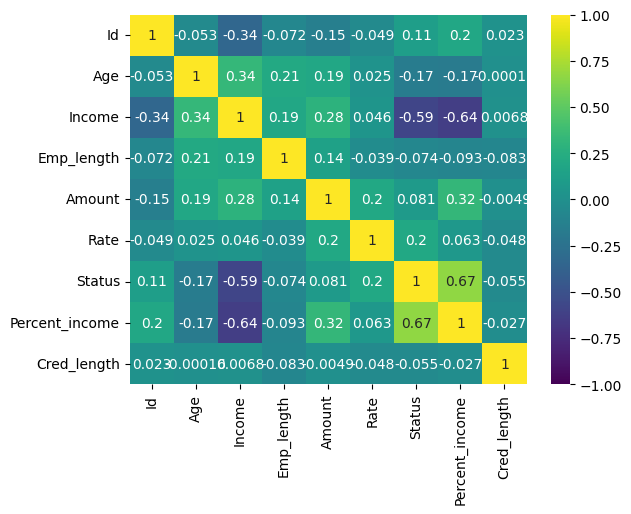

In [12]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'viridis')

Тепловая карта доказывает линейную зависимость таких параметров как Income и Status, Income и Percent_income, Status и Percent_income.  

## Задание 1

Использовать seaborn. По группировке - статус домовладения (home) по количеству
дефолтов (default) построить диаграмму следующего вида:

<ipython-input-13-c518d59309a9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new1 = df.groupby(by=['Home', 'Default']).size().reset_index(name='Count')


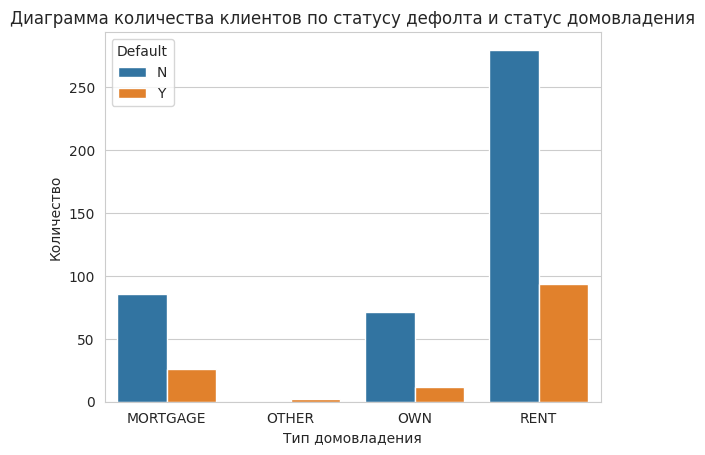

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


df_new1 = df.groupby(by=['Home', 'Default']).size().reset_index(name='Count')
sns.set_style("whitegrid")
sns.barplot(x="Home", y="Count", hue="Default", data=df_new1)
plt.title("Диаграмма количества клиентов по статусу дефолта и статус домовладения")
plt.xlabel("Тип домовладения")
plt.ylabel("Количество")

plt.show()


- Наибольший риск дефолта наблюдается среди арендаторов (RENT), так как их количество в состоянии дефолта значительно больше, чем в других категориях.
-Клиенты с ипотекой (MORTGAGE) и собственным жильем (OWN) чаще выплачивают свои кредиты без проблем, хотя дефолт встречается и среди них, но в меньшем количестве.

## Задание 2

Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю сумму кредита (amount) по цели кредита. Оставить только маркеры в виде ⬤ синего цвета размером 14.

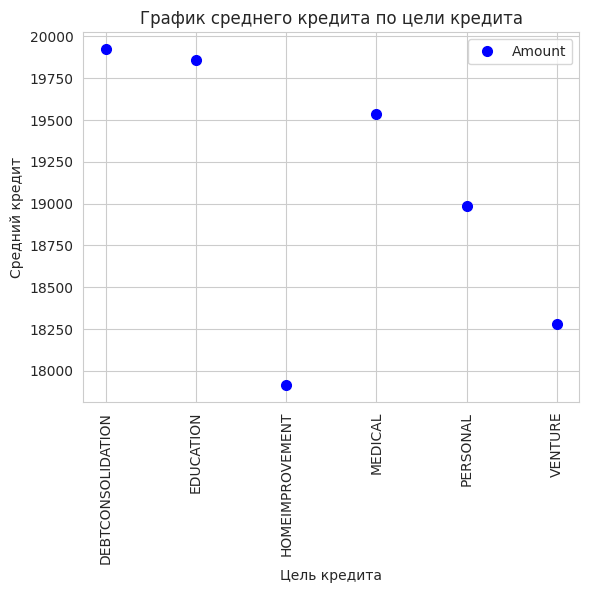

In [14]:
df.pivot_table(index=['Intent'],
               values = 'Amount',
               aggfunc='mean').plot(style='.', markersize = 14, color = 'blue', grid=True, ylabel = 'Средний кредит', xlabel = 'Цель кредита', title ='График среднего кредита по цели кредита')
plt.xticks(rotation=90)
plt.show()

- Наиболее высокие средние суммы кредитов выдаются для целей консолидации долгов и образования.
- Кредиты на личные нужды, предпринимательские цели и улучшение жилья имеют меньшие средние суммы, что указывает на то, что эти кредиты менее затратны.-

## Задание 3

Использовать matplotlib. Отфильтровать данные и выбрать default='N' Построить круговую диаграмму, которая отображает процент по типу домовладения (home).

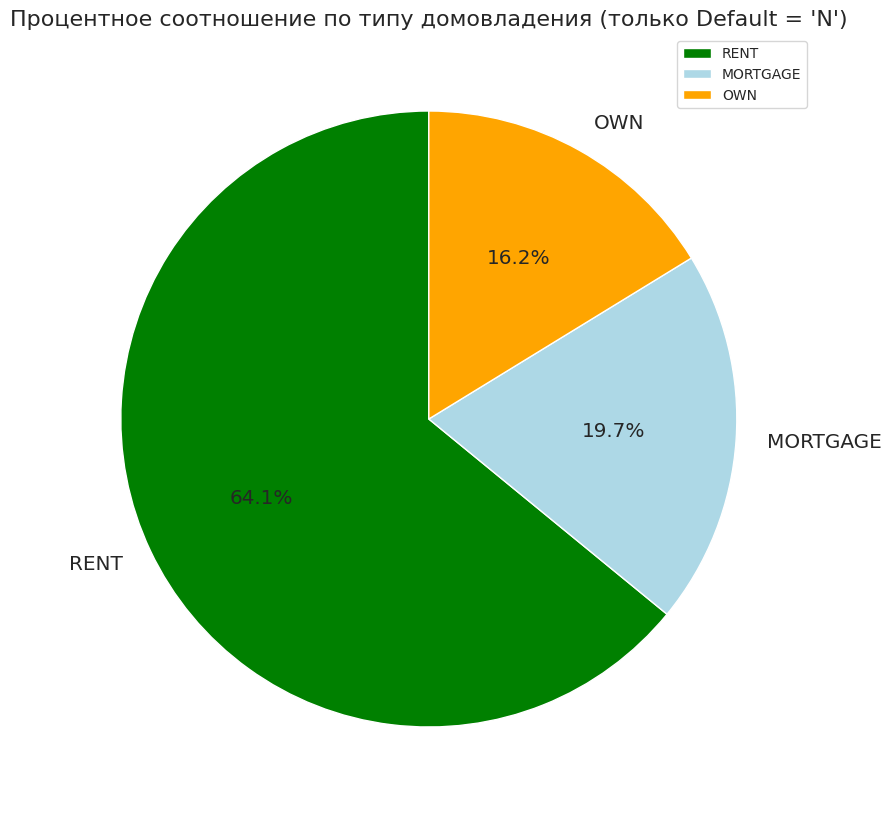

In [15]:
import matplotlib.pyplot as plt
df_filtered = df[df['Default'] == 'N']
home_counts = df_filtered['Home'].value_counts()
home_counts = home_counts[home_counts > 0]
plt.figure(figsize=(30, 10))
plt.pie(home_counts, labels=home_counts.index, autopct='%1.1f%%',startangle=90,  colors=['green', 'lightblue', 'orange', 'gold'], textprops={'size': 'x-large'})
plt.legend(home_counts.index, fontsize=10, loc='upper right')
plt.title("Процентное соотношение по типу домовладения (только Default = 'N')", fontsize=16)
plt.show()



Наибольшую долю среди клиентов, которые не оказались в дефолте, занимают арендующие жилье, что может говорить о более гибких финансовых обязательствах в сравнении с ипотекой или собственным жильем.

## Вывод

В результате выполнения данной лабораторной работы была разработана программа, которая позволила прочитать файл формата .csv и построить различные виды диаграмм на основе кредитных данных.

Полученные знания для работы с табличными данными позволили проанализировать информацию о кредитных заявках. Данные включали такие параметры, как возраст заявителя, доход, статус домовладения (собственное жилье, ипотека, аренда), стаж работы, цель кредита, сумма кредита, процентная ставка, статус одобрения кредита, сумма кредита в процентах от дохода, наличие дефолтов в прошлом и длина кредитной истории. Разнообразие данных позволило всесторонне оценить поведение клиентов, их кредитные риски и возможности для улучшения кредитной политики.

Выполнение работы позволило приобрести практические навыки работы с библиотеками `seaborn` и `matplotlib`. Были построены диаграммы рассеивания с параметром hue для улучшения визуализации данных. Использовались функции для расчета коэффициентов корреляции с помощью метода `corr()`, и на их основе была создана тепловая карта. В рамках индивидуальных заданий также были построены круговые диаграммы и бар-чарты для анализа зависимости статуса домовладения и дефолта, а также цели кредита и средней суммы кредита.

По итогу анализа данных было выявлено, что наиболее высокий риск дефолта наблюдается среди арендаторов, в то время как клиенты с собственным жильем или ипотекой демонстрируют более стабильное финансовое поведение. Также было замечено, что с увеличением дохода процент дохода, направляемый на погашение кредита, снижается, а вероятность отказа по кредиту уменьшается. Эти выводы могут быть использованы для оптимизации кредитных предложений и снижения рисков для банка.


## Дополнительное задание

### Задание 1

Сделать boxplot Income по Home

Объяснение:

Создается график "boxplot" (ящик с усами) для отображения распределения данных о доходах (Income) в зависимости от статуса домовладения (Home). Задаются параметры по осям, в качестве набора данных выбирается нужный DataFrame, параметр palette задает цветовую схему графика.

<ipython-input-16-d499a0e39098>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Home', y='Income', data=df, palette='Set3')


<Axes: xlabel='Home', ylabel='Income'>

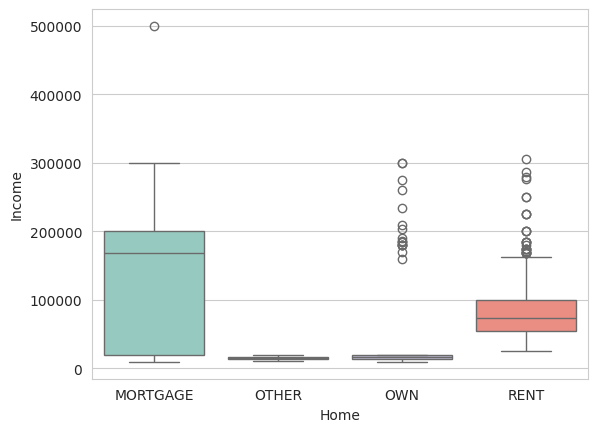

In [16]:
sns.boxplot(x='Home', y='Income', data=df, palette='Set3')

* MORTGAGE (ипотека): Люди, у которых ипотека, имеют наибольший разброс в доходах. Большая часть доходов находится на уровне до 200 000, но есть выбросы, превышающие 500 000.
* RENT (аренда): Доходы людей, снимающих жилье, ниже по сравнению с владельцами ипотек. Средний доход у этой группы ниже, и выбросы меньше по сравнению с ипотекой.
* OWN (собственное жилье): У владельцев собственного жилья разброс доходов меньше, чем у тех, кто платит ипотеку или арендует жилье, а медианный доход значительно ниже.
* OTHER: Эта категория показывает небольшие доходы с минимальными выбросами.

Вывод: Люди, которые платят ипотеку, имеют самый высокий доход, а те, кто арендует или владеет жильем, имеют более низкий средний доход.

### Задание 2

Сделать boxplot Income по Intent

Объяснение:

Создается график "boxplot" (ящик с усами) для отображения распределения данных о доходах (Income) в зависимости от цели кредита (Intent). Задаются параметры по осям, в качестве набора данных выбирается нужный DataFrame, параметр palette задает цветовую схему графика.

<ipython-input-17-bf73fce7c1a6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Intent', y='Income', data=df, palette='Set3')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'EDUCATION'),
  Text(1, 0, 'MEDICAL'),
  Text(2, 0, 'VENTURE'),
  Text(3, 0, 'PERSONAL'),
  Text(4, 0, 'HOMEIMPROVEMENT'),
  Text(5, 0, 'DEBTCONSOLIDATION')])

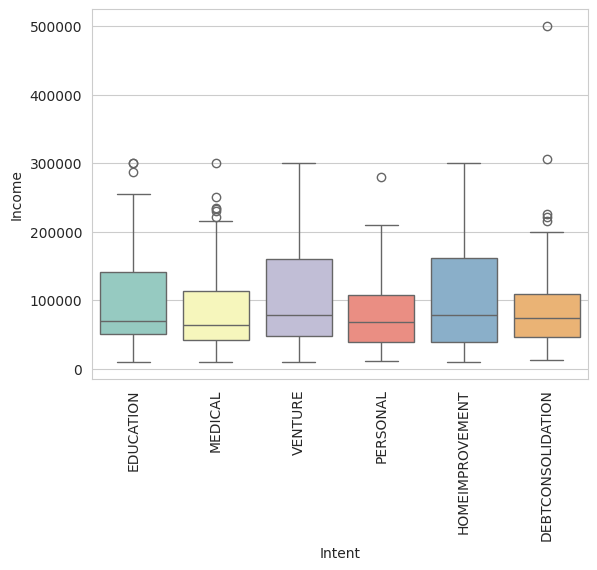

In [17]:
sns.boxplot(x='Intent', y='Income', data=df, palette='Set3')
plt.xticks(rotation=90)

* EDUCATION: Доходы для целей кредита на образование варьируются, но средний доход относительно невысок.
* MEDICAL: Доходы для кредитов на медицинские цели имеют небольшой разброс и находятся на среднем уровне.
* VENTURE: Для бизнес-кредитов наблюдается наибольший разброс доходов и присутствуют выбросы, что может свидетельствовать о более высоких доходах у части заемщиков.
* PERSONAL: Для личных целей кредиты имеют средний уровень дохода и относительно небольшой разброс.
* DEBTCONSOLIDATION: Наибольший разброс доходов среди всех категорий говорит о том, что люди с разными уровнями дохода берут кредиты на консолидацию долгов.
* HOMEIMPROVEMENT: Доходы в этой категории тоже варьируются, но медиана и общий разброс доходов ниже, чем у других целей.

Цели кредита варьируются в зависимости от уровня дохода. Кредиты на бизнес и консолидацию долгов берут люди с более высокими доходами

### Задание 3

Построить первый график построить без seaborn

Объяснение:

Для начала группируются данные по двум столбцам, затем используется метод size() для подсчета записей для комбинации, далее unstack(fill_value=0) — преобразует таблицу так, чтобы значения дефолта (из колонки Default) стали столбцами, а значения домовладения (из колонки Home) остались индексами.
fill_value=0 — если для какой-то комбинации домовладения и дефолта не было значений, мы заменяем их на 0.

Создается пустой график с помощью функции subplots(), задается ширина колонок, определяются индексы для каждого типа домовладения

С помощью цикла строятся столбцы для каждой колонки Default
* enumerate(df_new1.columns) — итерирует по колонкам (Default_0, Default_1) и их индексам.
* ax.bar(...) — строит столбчатую диаграмму.
* x + i * bar_width —  координата для начала каждого столбца. Смещение на ширину bar_width, чтобы столбцы для разных статусов дефолта не перекрывали друг друга.
* df_new1[default] — количество клиентов для соответствующего статуса дефолта.
* bar_width — ширина столбцов.
* label=default — добавляем метку для каждого статуса дефолта.

Добавляются заголовки и подписи для осей графика, задаются позиции для меток на оси X, добавляется легенда для графика.

Функция plt.tight_layout() используется для того, чтобы все элементы графика были аккуратно размещены и не перекрывали друг друга. После отображается график

<ipython-input-18-299f83fbb5ec>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new1 = df.groupby(['Home', 'Default']).size().unstack(fill_value=0)


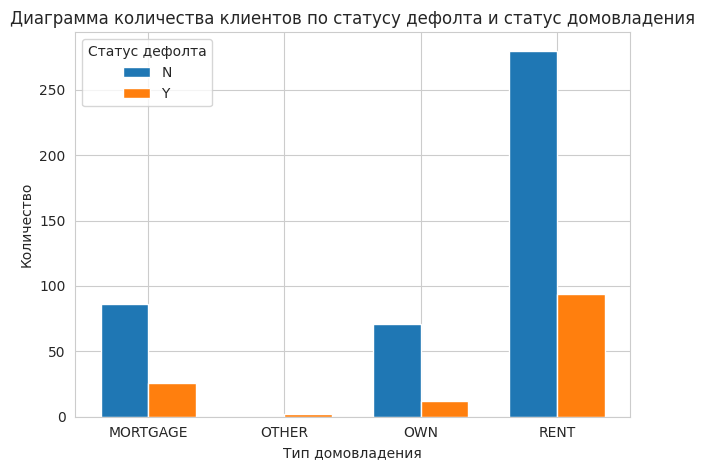

In [18]:
import matplotlib.pyplot as plt

df_new1 = df.groupby(['Home', 'Default']).size().unstack(fill_value=0)

fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(df_new1.index))

for i, default in enumerate(df_new1.columns):
    ax.bar([x + i * bar_width for x in index], df_new1[default], bar_width, label=default)

ax.set_title("Диаграмма количества клиентов по статусу дефолта и статус домовладения")
ax.set_xlabel("Тип домовладения")
ax.set_ylabel("Количество")
ax.set_xticks([x + bar_width / 2 for x in index])
ax.set_xticklabels(df_new1.index)
ax.legend(title="Статус дефолта")

plt.tight_layout()
plt.show()
